### 1. Importing all the essential libraries

In [2]:
import string 
import re
import codecs
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

### 2. Loading the data

In [12]:
# Loading indonesian raw data

indonesian_df = pd.read_csv("datasets/indonesian.csv", header=None, names=['indonesian'])
indonesian_df.head()

,indonesian
0,(air) susu dibalas dng (air) tuba
1,(bagai) duri dalam daging
2,(me)rentan hati
3,(persetujuan) masih di perawanan
4,(sbg durian) pangsa menunjukkan bangsa (sbg du...


In [13]:
# Loading raw javanese data

javanese_df = pd.read_csv("datasets/javanese.csv", header=None, names=['javanese'])
javanese_df.head()

,javanese
0,(banyu) susu dijawab (banyu) tuba
1,(kaya) eri ing daging
2,(kula) rawan karo ati
3,(Persetujuan) isih ana kerentanan
4,(minangka Durian) Berbagi nuduhake bangsa (min...


In [15]:
# # Loading raw sundanese data

# sundanese_df = pd.read_csv("datasets/sundanese.csv", header=None, names=['sundanese'])
# sundanese_df.head()

### 3. Data Preprocessing

In [16]:
for char in string.punctuation:
    print(char, end = ' ')
translate_table = dict((ord(char), None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [19]:
# Cleaning the data for indonesian dataset

data_indo = []
lang_indo = []

for i, row in indonesian_df.iterrows():
    line = row['indonesian']

    # Check if the value in the "indonesian" column is a string
    if isinstance(line, str):
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_indo.append(line)
        lang_indo.append("indonesian")

In [20]:
# Cleaning the data for javanese dataset

data_jawa = []
lang_jawa = []

for i, row in javanese_df.iterrows():
    line = row['javanese']

    # Check if the value in the "javanese" column is a string
    if isinstance(line, str):
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_jawa.append(line)
        lang_jawa.append("javanese")

In [21]:
# # Cleaning the data for sundanese dataset

# data_sunda = []
# lang_sunda = []

# for i, row in sundanese_df.iterrows():
#     line = row['sundanese']

#     # Check if the value in the "sundanese" column is a string
#     if isinstance(line, str):
#         line = line.lower()
#         line = re.sub(r"\d+", "", line)
#         line = line.translate(translate_table)
#         data_sunda.append(line)
#         lang_sunda.append("sundanese")

### 4. Transforming the data into a single dataset

In [22]:
df = pd.DataFrame({
    "Text" : data_indo+data_jawa,
    "Language" : lang_indo+lang_jawa
    # "Text" : data_indo+data_jawa+data_sunda,
    # "Language" : lang_indo+lang_jawa+lang_sunda
})

print(df.shape)

(210449, 2)


In [23]:
df.head()

,Text,Language
0,air susu dibalas dng air tuba,indonesian
1,bagai duri dalam daging,indonesian
2,merentan hati,indonesian
3,persetujuan masih di perawanan,indonesian
4,sbg durian pangsa menunjukkan bangsa sbg duria...,indonesian


In [24]:
df.tail()

,Text,Language
210444,itqun min annār,javanese
210445,izzatu annafsi,javanese
210446,izzulislām walmuslimin,javanese
210447,ดfaturraḥmān,javanese
210448,ālam arḥām,javanese


In [25]:
df['Language'].value_counts()

javanese      105225
indonesian    105224
Name: Language, dtype: int64

<Axes: xlabel='Language', ylabel='count'>

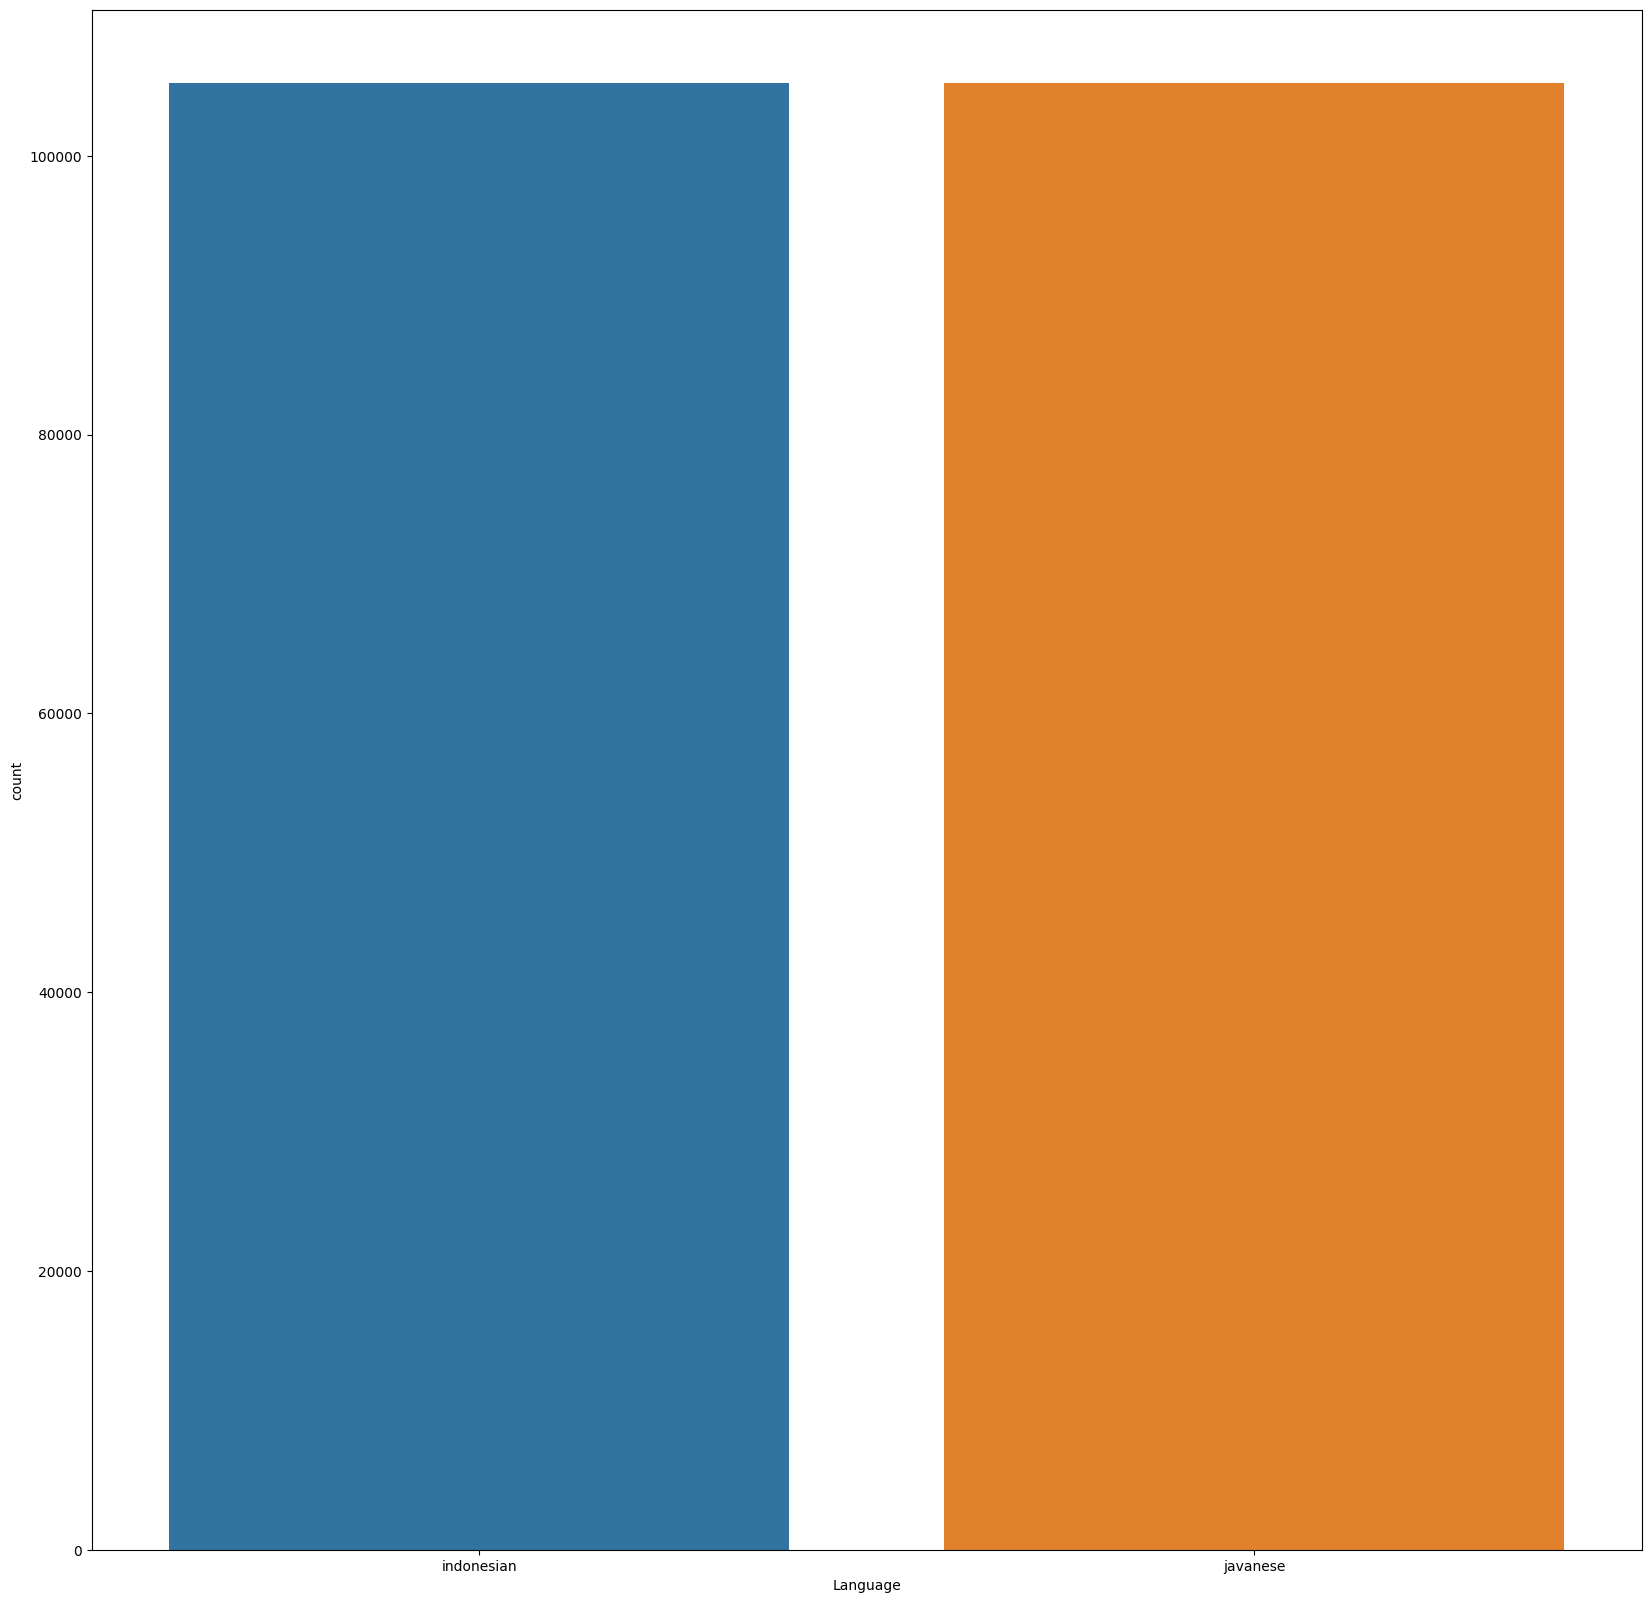

In [26]:
plt.figure(figsize=(20,20))
sns.countplot(x = df['Language'], data=df)

### 5. Splitting the dataset

* Splitting the dataset into Independent and Dependent variables

In [27]:
x = df.iloc[:,0] # Independent Variable
y = df.iloc[:,1] # Dependent Variable

In [28]:
y.head()

0    indonesian
1    indonesian
2    indonesian
3    indonesian
4    indonesian
Name: Language, dtype: object

In [29]:
x.head()

0                        air susu dibalas dng air tuba
1                              bagai duri dalam daging
2                                        merentan hati
3                       persetujuan masih di perawanan
4    sbg durian pangsa menunjukkan bangsa sbg duria...
Name: Text, dtype: object

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Applying TF-IDF Vectorizer

* `ngram_range` : It collets one , one two, one two three words 
* `analyzer` : We are not going word by word here we are going character by character that why we have used **char**.

In [31]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')

In [32]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [33]:
pipe_mnb.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MultinomialNB())])

In [34]:
pipe_lr = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('lr_clf', LogisticRegression())
])

In [35]:
pipe_lr.fit(x_train, y_train)

c:\Users\biman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('lr_clf', LogisticRegression())])

## Model Prediction for Logistic Regression

In [36]:
lr_predicted = pipe_lr.predict(x_test)

## Model evaluation for Logistic Regression

In [37]:
lr_acc = (metrics.accuracy_score(y_test, lr_predicted))*100
print('The logistic regression has:',lr_acc,'% accuracy')

The logistic regression has: 70.152055119981 % accuracy


## Model Prediction for MultinomialNB

In [38]:
mnb_predicted = pipe_mnb.predict(x_test)

## Model Evaluation for MultinomialNB

In [39]:
mnb_acc = (metrics.accuracy_score(y_test, mnb_predicted))*100
print('The MultinomialNB has :',mnb_acc,'% accuracy')

The MultinomialNB has : 66.00380137799952 % accuracy


## Evaluation matrix for Logistic Regression

In [40]:
matrix = metrics.confusion_matrix(y_test, lr_predicted)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[15008  6010]
 [ 6553 14519]]


In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Actual labels',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


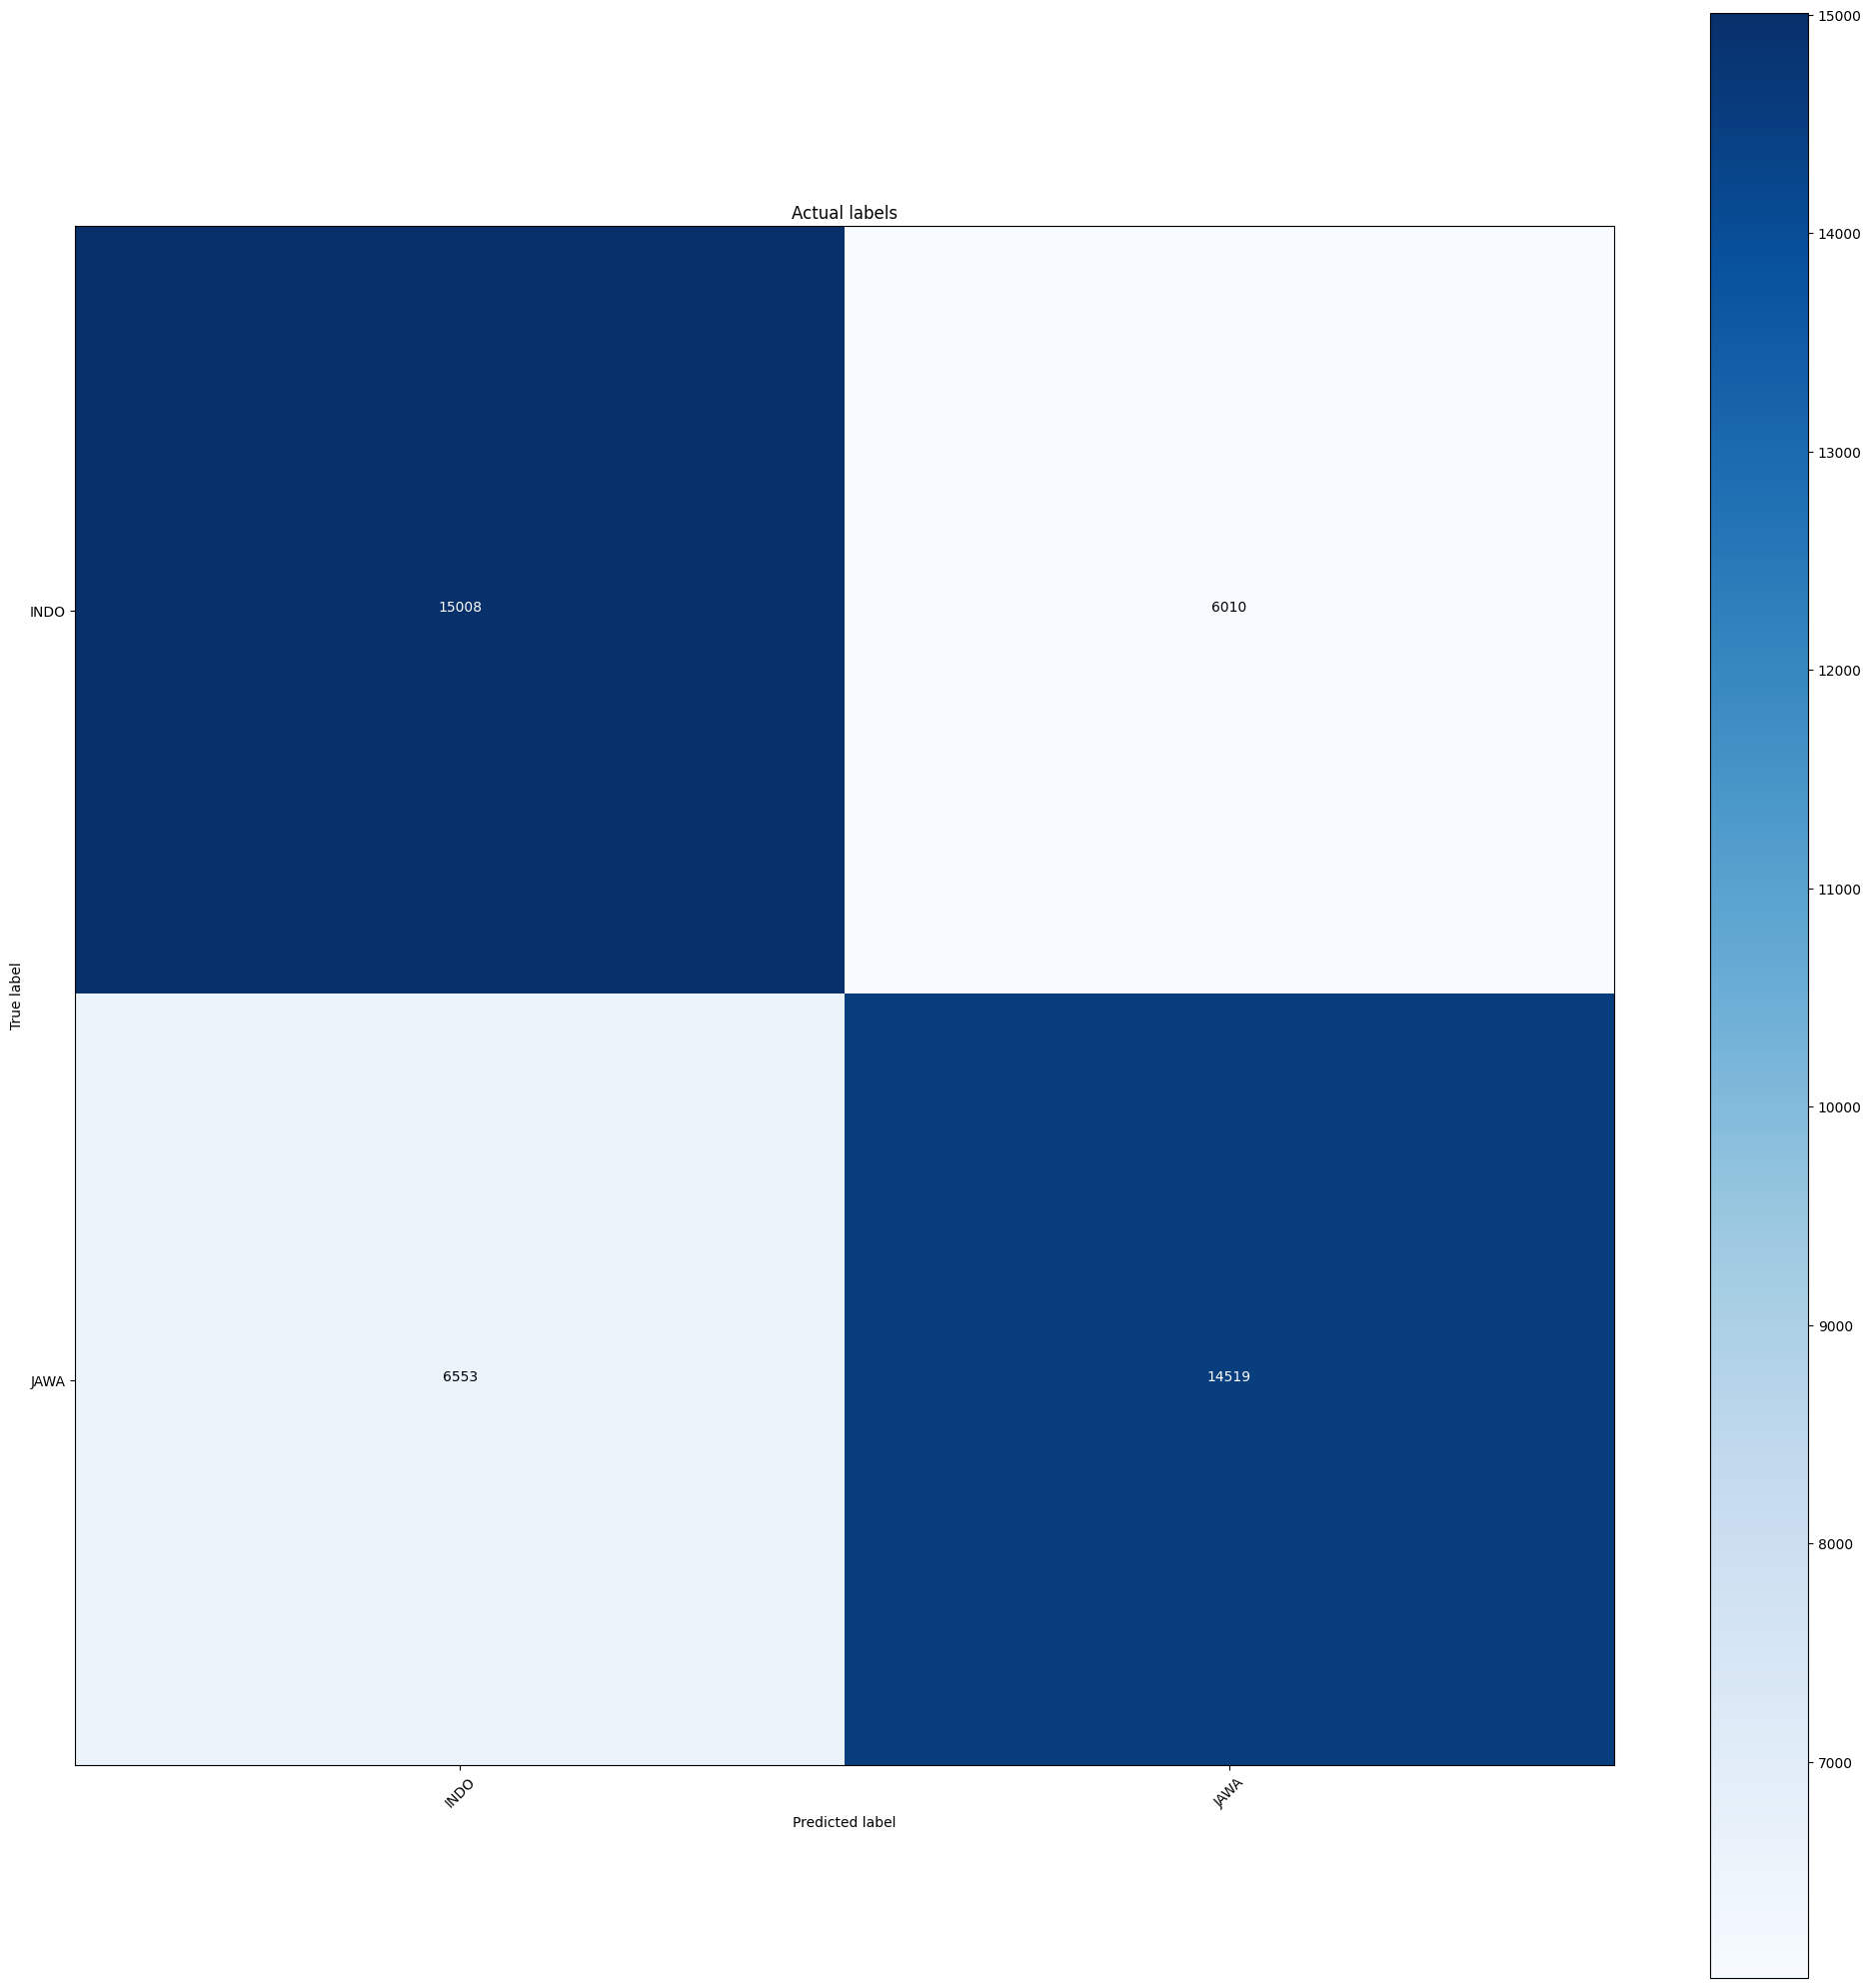

In [42]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(matrix, classes = ['INDO', 'JAWA'])
# plot_confusion_matrix(matrix, classes = ['INDO', 'JAWA', 'SUNDA'])

In [43]:
import pickle

In [44]:
lrfile = open('model/lrmodel.pckl', 'wb')
pickle.dump(pipe_lr, lrfile)
lrfile.close()